In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import sys, os

## Measurements by Tony Hessels for holes to be used as reference for the new mapping


In [2]:
# points_Cycl_center = points_Cycl_center.T
# MSR_CENTER = np.array([34527.4688, 2890.5609, -1362.6374]) #mm [x,y,z]

NameArr = ['Point Name', 'x original', 'y original', 'z original', 'x MSR', 'y MSR', 'z MSR']

# measuments in mm
basePoints = pd.read_csv('Plate Hole Locations.csv', skiprows=3, usecols=[0,2,3,4,6,7,8], 
                         names=NameArr, index_col='Point Name')
basePoints = basePoints[basePoints.index.notnull()]

basePoints.loc[['L (G)', 'L (R)']]

,x original,y original,z original,x MSR,y MSR,z MSR
Point Name,,,,,,
L (G),33715.3968,1254.8530,-610.9139,-812.0720,-1635.7079,751.7235
L (R),35341.0627,1253.8676,-610.8194,813.5939,-1636.6933,751.8180


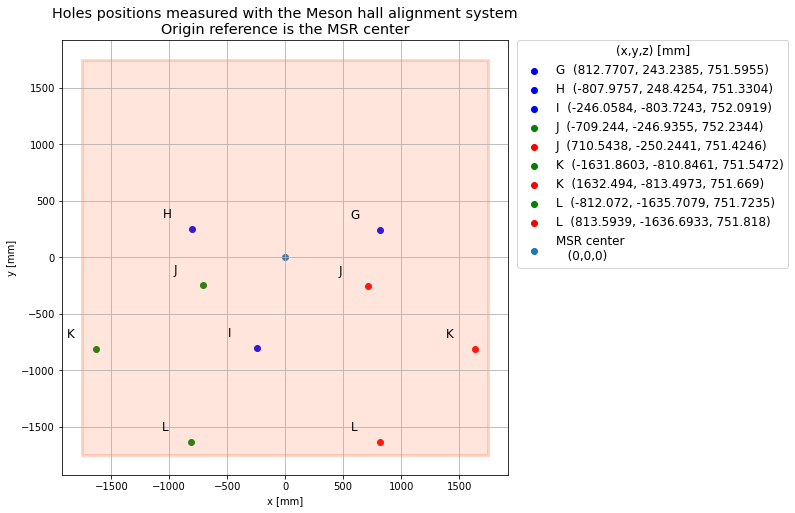

In [3]:
fig, ax = plt.subplots(figsize=(8,8))
txtshx = -0.25*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

# plt.scatter(points_Cycl_center[0], points_Cycl_center[1])
for i, txt in enumerate(basePoints.index[:-1]):
    if txt[-2]=='B':
        c= 'blue'
    elif txt[-2]=='R':
        c= 'red'
    elif txt[-2]=='G':
        c= 'green'
        
    plt.scatter(basePoints.loc[txt][3], basePoints.loc[txt][4], color=c, 
        label=txt[:2]+ f" ({basePoints.loc[txt][3]}, {basePoints.loc[txt][4]}, {basePoints.loc[txt][5]})")
    ax.annotate(txt[:2], # f" ({points_Cycl_center[0][i]:.3}, {points_Cycl_center[1][i]:.3})", \
                (basePoints.loc[txt][3], basePoints.loc[txt][4]), 
                xytext=(basePoints.loc[txt][3]+txtshx, basePoints.loc[txt][4]+txtshy))

# MSR_shift = -51.67/100 #m
ax.scatter(basePoints.loc['MSR center'][3], basePoints.loc['MSR center'][4], label=f"MSR center\n   (0,0,0)")

# ax.annotate(f'MSR center', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
#             (MSR_CENTER[0]+txtshx-0.25, MSR_CENTER[1]+txtshy))

# Create a Rectangle patch
sideLength = 3.5*1000 #mm
rect = patches.Rectangle((-sideLength/2+basePoints.loc['MSR center'][3], -sideLength/2+basePoints.loc['MSR center'][4]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2)
# ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Holes positions measured with the Meson hall alignment system"+
             "\nOrigin reference is the MSR center")


# Lx = basePoints.loc['L (R)']
# xlim = [-1400, Lx[3]+500]
# ylim = [Lx[4]-100, 1600]
# axis_rangex = np.arange(xlim[0], xlim[1], 400)
# axis_rangey = np.arange(ylim[0], ylim[1], 400)
# ax.set_xticks(axis_rangex)
# ax.set_yticks(axis_rangey)

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")

plt.grid()
# print(38000 - 32500)
# print(4800 - 0)
#setting limits to get a square grid
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(ylim[0], ylim[1])
plt.show()

In [4]:
#using L as origin

In [5]:
#quick math as we set up

In [6]:
toply = 124.5 #cm
ply=1.8

toBase=toply+ply
toBase

126.3

In [7]:
Mark_130 = toBase+1.1
Mark_130

127.39999999999999